In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
model = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),layers.Conv2D(64, (3, 3), activation='relu'),
 layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - 13ms/step - accuracy: 0.1160 - loss: 2.3042
Test accuracy: 0.11599999666213989


In [7]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


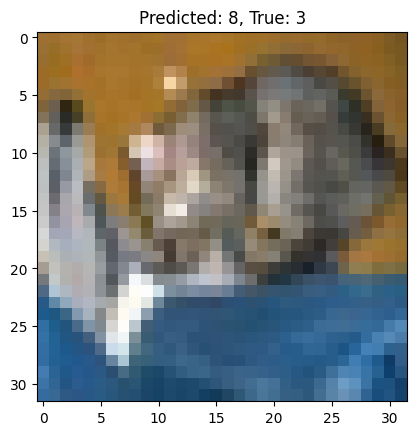

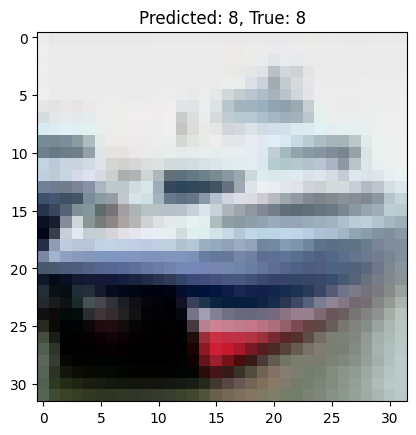

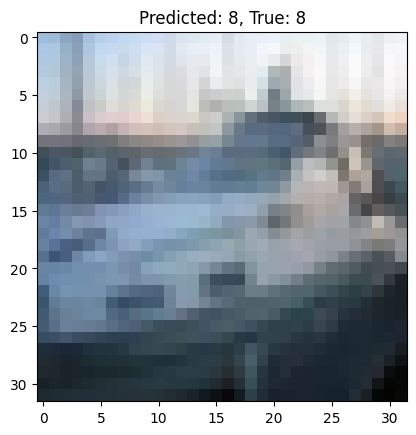

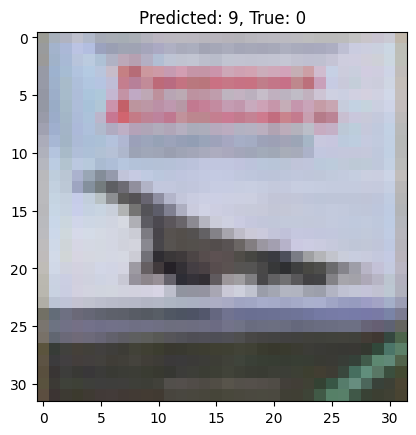

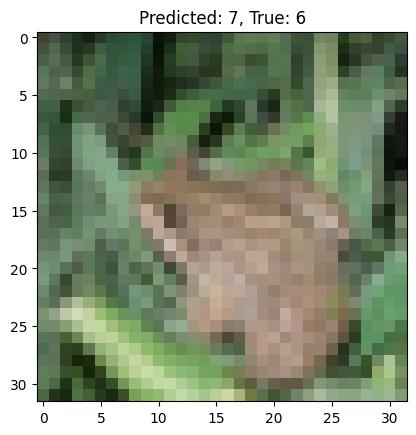

In [8]:
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i][0]}')
    plt.show()